In [156]:
import numpy as np
from matplotlib import pyplot as plt


In [157]:
x = np.array([[1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1],
              [1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1,  1, -1, -
                  1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, 1, 1, 1, 1, 1],
              [-1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1,
                  1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1],
              ])


In [158]:
class HopfieldNetwork(object):
    def train_weights(self, train_data):
        self._num_neuron = train_data[0].shape[0]

        W = np.zeros((self._num_neuron, self._num_neuron))
        for i in range(self._num_neuron):
            for j in range(self._num_neuron):
                if i != j:
                    W[i, j] = np.sum(train_data[:, j] * train_data[:, i])

        self._w = W

    def predict(self, data):
        result = np.zeros(data.shape)
        while True:
            net = np.dot(data, self._w)
            for i, row in enumerate(net):
                result[i] = np.array(list(map(self.activation_function, row)))
            if (data == result).all():
                break
            data = result
        return data

    def activation_function(self, x):
        if x > 0:
            return 1
        else:
            return -1


In [159]:
network = HopfieldNetwork()
network.train_weights(x)


In [160]:
for i, s in enumerate(x):
    for j in np.random.randint(0, len(s), size=5):
        x[i, j] *= -1


In [161]:
y = network.predict(x)


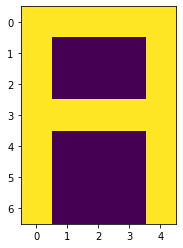

In [162]:
plt.imshow(np.array(y[0]).reshape(7, -1))


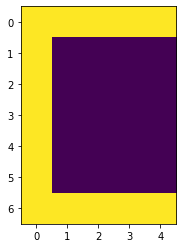

In [163]:
plt.imshow(np.array(y[1]).reshape(7, -1))


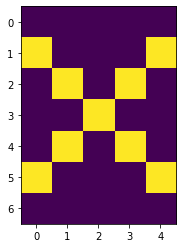

In [164]:
plt.imshow(np.array(y[2]).reshape(7, -1))
